## Process Optimization - the `Main` code 

### Initial Sampling with Latin Hypercube Sampling
- Stanford - MIT collaboration, led by Liu Zhe, Nick Rolston and Thomas Colburn
- v1. Initial sampling in Sep 2020

### Load packages and functions

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs.random_design import RandomDesign
from emukit.core.initial_designs.latin_design import LatinDesign

In [51]:
def x_normalizer(X, var_array):
    
    def max_min_scaler(x, x_max, x_min):
        return (x-x_min)/(x_max-x_min)
    x_norm = []
    for x in (X):
           x_norm.append([max_min_scaler(x[i], 
                                         max(var_array[i]), 
                                         min(var_array[i])) for i in range(len(x))])
            
    return x_norm

def x_denormalizer(x_norm, var_array):
    
    def max_min_rescaler(x, x_max, x_min):
        return x*(x_max-x_min)+x_min
    x_original = []
    for x in (x_norm):
           x_original.append([max_min_rescaler(x[i], 
                                         max(var_array[i]), 
                                         min(var_array[i])) for i in range(len(x))])
            
    return x_original

def get_closest_value(given_value, array_list):
    absolute_difference_function = lambda list_value : abs(list_value - given_value)
    closest_value = min(array_list, key=absolute_difference_function)
    return closest_value
    
def get_closest_array(suggested_x, var_list):
    modified_array = []
    for x in suggested_x:
        modified_array.append([get_closest_value(x[i], var_list[i]) for i in range(len(x))])
    return np.array(modified_array)

### Parameter Optimiziton Space: 
- Temperature: 125 - 175 (5 degC/10 degC - 11 steps)
- Speed: 100 - 300 mm/s (25 mm/s - 9 steps)
- SprayFL: 2000 uL/min - 5000 uL/min (500 uL/min - 7 steps)
- Gas Flow Rate: 15 - 35 L/min (5 L/min - 5 steps)
- Plasma Duty Cycle: 25% - 100% (25% - 4 steps)
- Plasma Height: 0.8 - 1.2 cm (0.2 cm - 3 steps)

In [52]:
temp_min, temp_max, temp_step = [125, 175, 5] ## Unit: degC
temp_var = np.arange(temp_min, temp_max+temp_step, temp_step)
temp_num = len(temp_var)

speed_min, speed_max, speed_step = [100, 300, 25] ## Unit: mm/s
speed_var = np.arange(speed_min, speed_max+speed_step, speed_step)
speed_num = len(speed_var)

sprayFL_min, sprayFL_max, sprayFL_step = [2000, 5000, 500] ## Unit: uL/min
sprayFL_var = np.arange(sprayFL_min, sprayFL_max+sprayFL_step, sprayFL_step) 
sprayFL_num = len(sprayFL_var)

gasFL_min, gasFL_max, gasFL_step = [15, 35, 5] ## Unit: L/min
gasFL_var = np.arange(gasFL_min, gasFL_max+gasFL_step, gasFL_step)
gasFL_num = len(gasFL_var)

plasmaDC_min, plasmaDC_max, plasmaDC_step = [25, 100, 25] # Unit: [%]
plasmaDC_var = np.arange(plasmaDC_min, plasmaDC_max+plasmaDC_step, plasmaDC_step)
plasmaDC_num = len(plasmaDC_var)

plasmaH_min, plasmaH_max, plasmaH_step = [0.8, 1.2, 0.2] # Unit: cm
plasmaH_var = np.arange(plasmaH_min, plasmaH_max+plasmaH_step, plasmaH_step)
plasmaH_num = len(plasmaH_var)


var_array = [temp_var, speed_var, 
             sprayFL_var, plasmaH_var, 
             gasFL_var, plasmaDC_var]
x_labels = ['Temp [degC]', 
            'speed [mm/s]', 
            'sprayFL [uL/min]',  
            'plamsaH [cm]', 
            'gasFL [L/min]',
            'plasmaDC [%]']

### Initial Sampling

In [53]:
parameter_space = ParameterSpace([ContinuousParameter('x1', 0, 1),
                                 ContinuousParameter('x2', 0, 1),
                                 ContinuousParameter('x3', 0, 1),
                                 ContinuousParameter('x4', 0, 1),
                                 ContinuousParameter('x5', 0, 1),
                                 ContinuousParameter('x6', 0, 1)
                                 ])

# parameter_space = ParameterSpace([DiscreteParameter('x1', np.linspace(0,1, 51)),
#                                  DiscreteParameter('x2', np.linspace(0,1, 51)),
#                                  DiscreteParameter('x3', np.linspace(0,1, 51)),
#                                  DiscreteParameter('x4', np.linspace(0,1, 51)),
#                                  DiscreteParameter('x5', np.linspace(0,1, 51)),
#                                  DiscreteParameter('x6', np.linspace(0,1, 51))
#                                  ])

In [58]:
design = LatinDesign(parameter_space)
x_init = design.get_samples(20)
x_init_original = get_closest_array(x_denormalizer(x_init, var_array),var_array)

df = pd.DataFrame(x_init_original, columns = x_labels)
df_cols = x_labels
df

,Temp [degC],speed [mm/s],sprayFL [uL/min],plamsaH [cm],gasFL [L/min],plasmaDC [%]
0,155.0,200.0,5000.0,1.2,35.0,50.0
1,160.0,225.0,3000.0,0.8,30.0,75.0
2,135.0,200.0,2500.0,1.0,25.0,75.0
3,150.0,175.0,2000.0,1.0,20.0,100.0
4,170.0,275.0,4500.0,1.2,15.0,50.0
5,175.0,250.0,3500.0,1.2,25.0,75.0
6,140.0,150.0,4000.0,1.0,20.0,75.0
7,155.0,225.0,4000.0,0.8,30.0,25.0
8,130.0,175.0,3500.0,0.8,25.0,75.0
9,135.0,125.0,2500.0,1.2,20.0,25.0


##### Visualize the distribution of the initial data

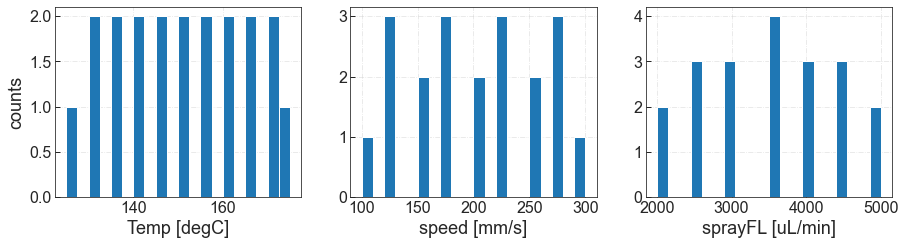

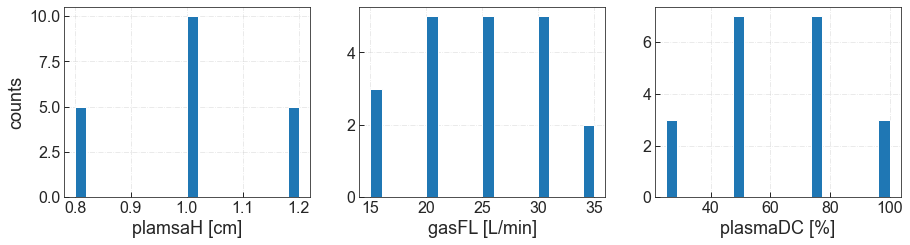

In [59]:
sns.set_style("ticks",{'xtick.direction': 'in', # set the style of the plot using seaborn
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})

n_col = 3 # num of columns per row in the figure
for n in np.arange(0, 6, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(15, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            axes[i].hist(df.iloc[:,n], bins = 20)
            axes[i].set_xlabel(df_cols[n], fontsize = 18)
        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

In [60]:
### df.to_excel("output.xlsx") 